# Meteorological data for SnowEx 2020
---
*J. Michelle Hu  
University of Utah  
August 2024*  


Items of note to plot:
- freezing depth
- time series of soil moisture, soil temperature
- precipitation events
- overlying temperature conditions
>> figure out if any of the data is not useful and should be dropped

## Study plot
- Use Mesa West (MW) station
- Plot a map of all the stations
- Find precip gauge and get actual P events

In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [2]:
sns.set_palette(sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=False))

In [21]:
# start = datetime(2019, 11, 5)
# end = datetime(2019, 11, 6)

# start = datetime(2020, 2, 7)
# end = datetime(2020, 2, 10)

start = datetime(2019, 11, 1)
end = datetime(2019, 11, 11)

# start = datetime(2020, 1, 1)
# end = datetime(2020, 6, 1)
start, end

(datetime.datetime(2019, 11, 1, 0, 0), datetime.datetime(2019, 11, 11, 0, 0))

In [22]:
# Read in and clean up PoR met data
df = pd.read_csv('./SNEX_Met_GMSP2_final_output.csv')
# df = pd.read_csv('./cache/SNEX_Met_GMSP2_final_output.csv') # getting access denied
df['datetime'] = pd.to_datetime(df['TIMESTAMP'])
df = df.drop(columns=['TIMESTAMP']).set_index('datetime')
variables = ['RH_10ft', 'RH_20ft','AirTC_20ft_Avg', 'AirTC_10ft_Avg',
             'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg', 
             'TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 
             'SnowDepthFilter(m)']

drop = [col for col in df.columns if col not in variables]
df.drop(columns=drop, inplace=True)
# Clean the data a bit
# Replace no data values with nan
ndv = -9999
df[df==ndv] = np.nan
filtered_df = df.loc[(df.index >= start)
                     & (df.index < end)]
filtered_df.head()

,RH_10ft,RH_20ft,AirTC_20ft_Avg,AirTC_10ft_Avg,SM_5cm_Avg,SM_20cm_Avg,SM_50cm_Avg,TC_5cm_Avg,TC_20cm_Avg,TC_50cm_Avg,SnowDepthFilter(m)
datetime,,,,,,,,,,,
2019-11-01 00:00:00,34.302,27.088,-4.006,-4.482,0.071,0.120,0.174,0.2,1.402,3.500,0.271
2019-11-01 01:00:00,33.120,25.352,-4.956,-5.680,0.072,0.120,0.174,0.2,1.400,3.498,0.277
2019-11-01 02:00:00,24.517,19.552,-3.916,-4.707,0.072,0.120,0.173,0.2,1.400,3.494,0.271
2019-11-01 03:00:00,19.245,16.733,-3.039,-3.502,0.072,0.120,0.173,0.2,1.400,3.464,0.266
2019-11-01 04:00:00,17.980,16.265,-2.457,-2.708,0.072,0.119,0.173,0.2,1.400,3.407,0.262


### Set some defaults

In [23]:
timeperiod = 'h'
figsize = (12, 4)

### Plot air temperature

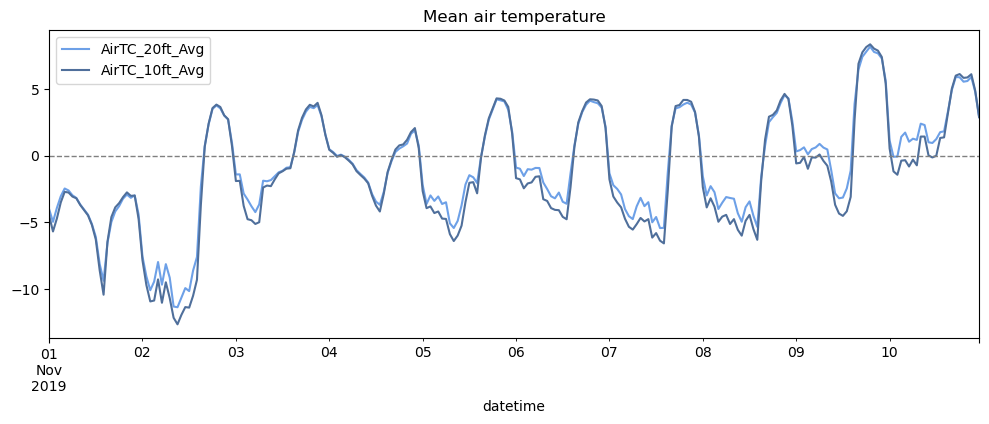

In [24]:
for var in ['AirTC_20ft_Avg', 'AirTC_10ft_Avg']:
    # print(var)
    filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
plt.title('Mean air temperature')
ax = plt.gca()
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
plt.legend();

### Plot soil temperature

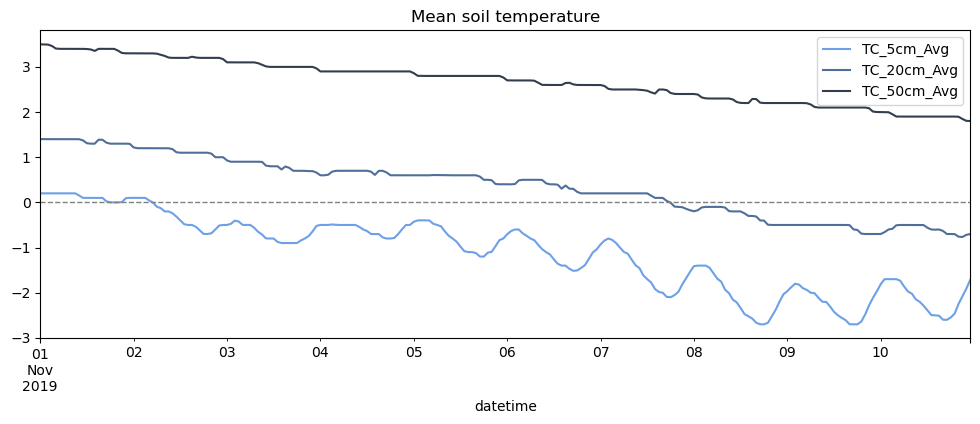

In [25]:
for var in ['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg']:
    # print(var)
    filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
plt.title('Mean soil temperature')
ax = plt.gca()
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
plt.legend();

Based on soil temperature, plot the freezing depths...  
temp at 50 cm < 0 --> freezing depth is at least 50 cm  
temp at 20 cm < 0 --> freezing depth is at least 20 cm  
temp at 5 cm < 0 --> freezing depth is at least 5 cm  

In [8]:
test_var = filtered_df['TC_5cm_Avg'].resample(timeperiod).mean()
test_var[test_var<0]
if len(test_var[test_var<0])>0:
    print('nonzero')
test_var[test_var<0].index

nonzero


DatetimeIndex(['2019-10-11 10:00:00', '2019-10-11 11:00:00',
               '2019-10-11 12:00:00', '2019-10-11 13:00:00',
               '2019-10-11 14:00:00', '2019-10-11 15:00:00',
               '2019-10-11 16:00:00', '2019-10-11 17:00:00',
               '2019-10-11 18:00:00', '2019-10-11 19:00:00',
               ...
               '2020-03-31 05:00:00', '2020-03-31 06:00:00',
               '2020-03-31 07:00:00', '2020-03-31 08:00:00',
               '2020-03-31 09:00:00', '2020-03-31 10:00:00',
               '2020-03-31 11:00:00', '2020-03-31 12:00:00',
               '2020-03-31 13:00:00', '2020-03-31 14:00:00'],
              dtype='datetime64[ns]', name='datetime', length=3683, freq=None)

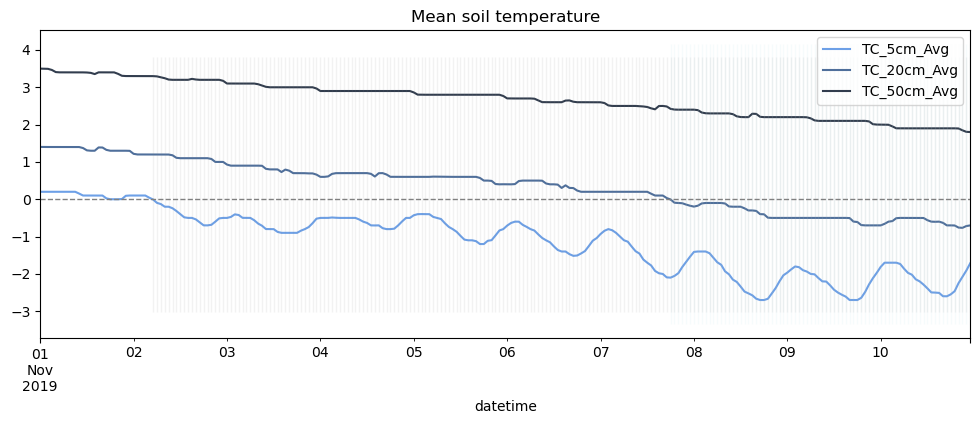

In [26]:
fig, ax = plt.subplots(figsize=figsize)
for var in ['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg']:
    filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)

# Plot times when temp at 50 cm < 0
test_var = filtered_df['TC_5cm_Avg'].resample(timeperiod).mean()
if len(test_var[test_var<0])>0:
    ax.vlines(x=test_var[test_var<0].index,
              ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='gray', linewidth=1, alpha=0.1);

# Plot times when temp at 20 cm < 0
test_var = filtered_df['TC_20cm_Avg'].resample(timeperiod).mean()
if len(test_var[test_var<0])>0:
    ax.vlines(x=test_var[test_var<0].index,
              ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightblue', linewidth=1, alpha=0.1);

# Plot times when temp at 5 cm < 0
test_var = filtered_df['TC_50cm_Avg'].resample(timeperiod).mean()
if len(test_var[test_var<0])>0:
    ax.vlines(x=test_var[test_var<0].index,
              ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='yellow', linewidth=1, alpha=0.1);
    
plt.title('Mean soil temperature')
ax = plt.gca()
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
plt.legend();

### Plot soil moisture

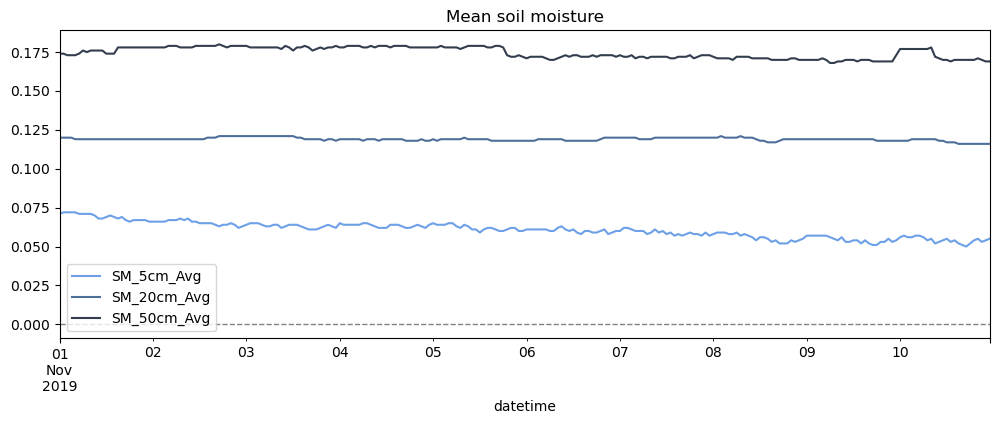

In [27]:
for var in ['SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg']:
    # print(var)
    filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
plt.title('Mean soil moisture')
ax = plt.gca()
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
plt.legend();

### Plot soil temp and moisture on the same plot

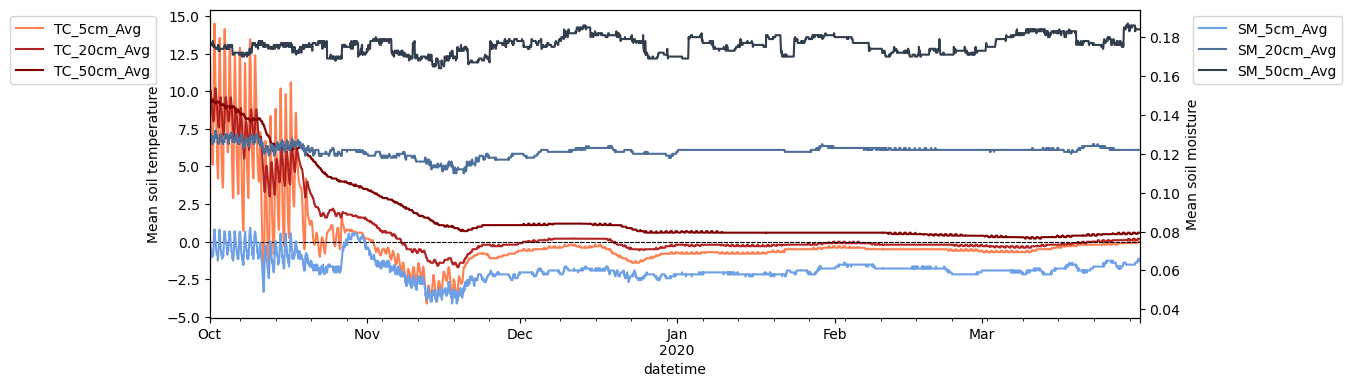

In [11]:
colors = ['coral', 'firebrick', 'maroon']

fig, ax = plt.subplots(1, figsize=figsize)
ax2 = ax.twinx()
for jdx, var in enumerate(['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg']):
    # print(var)
    if jdx < 3:
        filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', ax=ax, color=colors[jdx-3])
        ax.set_ylabel('Mean soil temperature')
        ax.legend(bbox_to_anchor=(-0.05,1));
        ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'k', linestyle='--', linewidth=0.75)
        
    else:
        filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', ax=ax2)
        ax2.set_ylabel('Mean soil moisture')
        ax2.legend(bbox_to_anchor=(1.05,1));

### And interactive

In [12]:
import hvplot.pandas

In [13]:
filtered_df.hvplot(y=['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg'],
                   color=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=False),
                   width=1000, height=400
                  )

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

In [14]:
filtered_df.hvplot(y=['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg'],
                   color=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=False), subplots=True, 
                   width=250, height=200)

:NdLayout   [Variable]
   :Curve   [datetime]   (value)

### Plot precipitation events

Using RH?

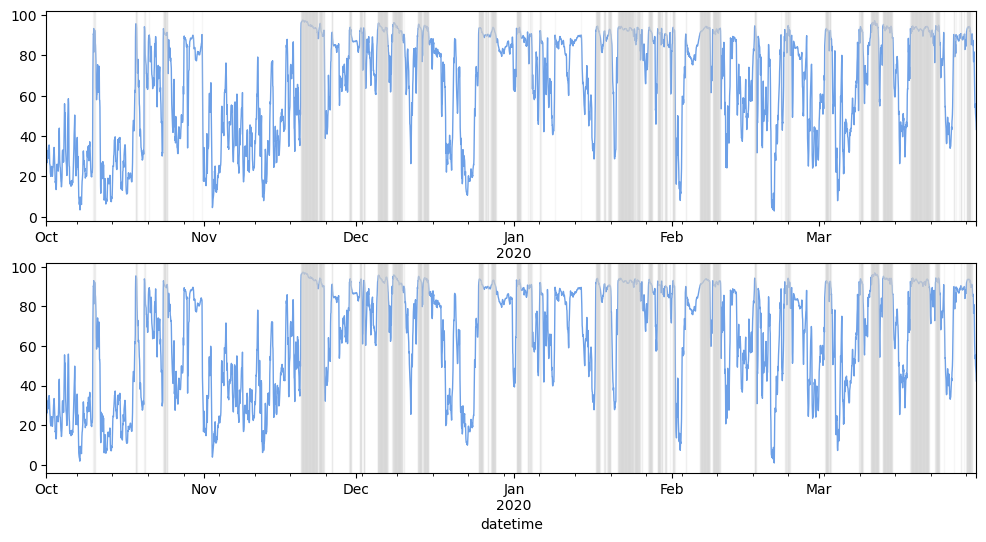

In [15]:
RH_thresh = 90
var = 'RH_10ft'
fig, axa = plt.subplots(2, 1, figsize=(12,6))
ax = axa[0]
filtered_df[var].resample('h').mean().plot(ax=ax, linewidth=1)
ylims = ax.get_ylim()
ax.vlines(x=filtered_df[var].resample('h').mean()[filtered_df[var].resample('h').mean()>=RH_thresh].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightgray', linewidth=1, alpha=0.2);
ax.set_ylim(ylims);


var = 'RH_20ft'
ax = axa[1]
filtered_df[var].resample('h').mean().plot(ax=ax, linewidth=1)
ylims = ax.get_ylim()
ax.vlines(x=filtered_df[var].resample('h').mean()[filtered_df[var].resample('h').mean()>=RH_thresh].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightgray', linewidth=1, alpha=0.2);
ax.set_ylim(ylims);

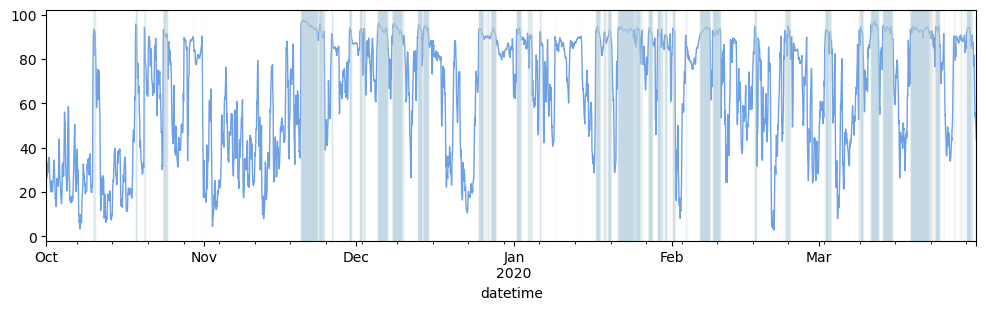

In [16]:
RH_thresh = 90
fig, ax = plt.subplots(figsize=(12,3))
filtered_df['RH_10ft'].resample('h').mean().plot(ax=ax, linewidth=1)
ylims = ax.get_ylim()
ax.vlines(x=filtered_df['RH_10ft'].resample('h').mean()[filtered_df['RH_10ft'].resample('h').mean()>=RH_thresh].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightgray', linewidth=1, alpha=0.1);
ax.vlines(x=filtered_df['RH_20ft'].resample('h').mean()[filtered_df['RH_20ft'].resample('h').mean()>=RH_thresh].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightblue', linewidth=1, alpha=0.1);

ax.set_ylim(ylims);

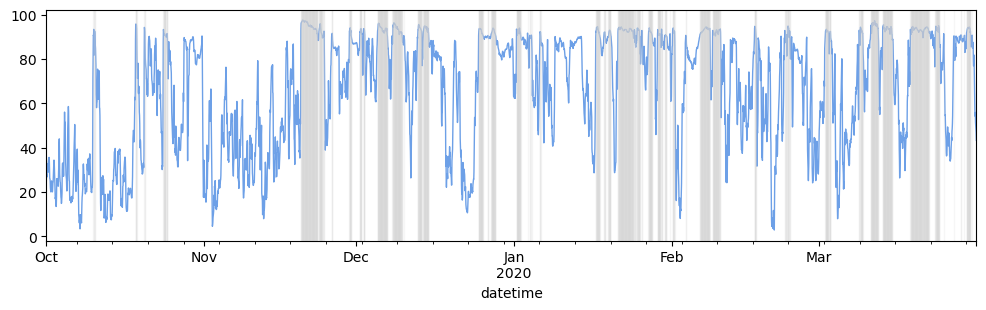

In [17]:
RH_thresh = 90
var = 'RH_10ft'
fig, ax = plt.subplots(figsize=(12,3))
filtered_df[var].resample('h').mean().plot(ax=ax, linewidth=1)
ylims = ax.get_ylim()
ax.vlines(x=filtered_df[var].resample('h').mean()[(filtered_df[var].resample('h').mean()>=RH_thresh)&(filtered_df['RH_20ft'].resample('h').mean()>=RH_thresh)].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightgray', linewidth=1, alpha=0.2);
ax.set_ylim(ylims);

In [18]:
# !python3 -m pip install metloom
# from metloom.pointdata import SnowExMet
# from metloom.variables import SnowExVariables
# for f in SnowExMet.ALLOWED_STATIONS:
#     print(f)
# variables = [SnowExMet.ALLOWED_VARIABLES.PRECIPITATION,
#              SnowExMet.ALLOWED_VARIABLES.SNOWDEPTH,
#              SnowExMet.ALLOWED_VARIABLES.SWE,
#              SnowExMet.ALLOWED_VARIABLES.TEMP_10FT,
#              SnowExMet.ALLOWED_VARIABLES.TEMP_20FT,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND5CM,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND20CM,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND50CM]

In [19]:
# # Grand Mesa Study Plot
# gmsp = SnowExMet('GMSP')
# df_gmsp = gmsp.get_hourly_data(datetime.timestamp(start), datetime.timestamp(end), [SnowExVariables.SNOWDEPTH])
# df_gmsp

In [20]:
# roi_fn = "/home/jovyan/shared-public/swesarr_project/base-layers/swesarr-roi.shp"
# poly = gpd.read_file(roi_fn)
# poly